In [1]:
import pickle
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
resultsDict = dict()
resultsDict[dataset][case][method] = dict()

datasets = ['German', 'Homecredit', 'Simulation']
datasets = ['German', 'Simulation']

operations = ['OR', 'AND', 'XOR']
cases = ['ind', 'com']

tuples_of_cases = {case: tuple('2V_' + operation + '_' + case + '_1' for operation in operations) for case in cases}

In [41]:
tuples_of_cases

{'ind': ('2V_OR_ind_1', '2V_AND_ind_1', '2V_XOR_ind_1'),
 'com': ('2V_OR_com_1', '2V_AND_com_1', '2V_XOR_com_1')}

In [45]:
for data in datasets:
    resultsDict[data] = dict()
    sweepsDict[data] = dict()
    for file in os.listdir('results/best/' + data):
        name = file[:-12]

        path_results = 'results/best/' + data + '/' + name + '_best.pickle'
        path_sweeps = 'results/sweep/' + data + '/' + name + '_sweep.pickle'

        with open(path_results, 'rb') as handle:    
            resultsDict[data][name] = pickle.load(handle)
        with open(path_sweeps, 'rb') as handle:
            sweepsDict[data][name] = pickle.load(handle)

names = resultsDict.keys()

In [46]:
def tidy_dataset(dataset):
    new_table = dataset.copy(deep = True)
    
    colNames = dataset.columns
    subset = [column for column in colNames if column not in ['best_threshold']]
    new_table.loc[:, subset] =  (new_table.loc[:, subset] - new_table.loc['logreg', subset])/new_table.loc['logreg', subset]*100
    return new_table



def compare_tables(dataset1, dataset2):
    new_table = dataset1.copy(deep = True) 
    new_table =  (dataset2 - dataset1)/dataset1*100
    return new_table



def obtain_results(name):

    comparison_log = dict()

    for name in datasets:
        comparison_log[name] = dict()
        for case in resultsDict[name].keys():
            comparison_log[name][case] = tidy_dataset(resultsDict[name][case])

    comparison_pair = dict()

    for name in datasets:
        comparison_pair[name] = dict() 
        for case in cases:
            comparison_pair[name][case] = dict()
            data1V = name + '1V_' + case + '_1'
            for operation in operations:
                data2V = name + '2V_' + operation + '_' + case + '_1'
                comparison_pair[name][case][operation] = dict()
                comparison_pair[name][case][operation] = compare_tables(resultsDict[name][data1V], resultsDict[name][data2V])

    return comparison_log, comparison_pair

    

In [29]:
resultsDict

{}

In [23]:
cases

[('1V_ind_1', '1V_com_1'),
 ('2V_OR_ind_1', '2V_OR_com_1'),
 ('2V_AND_ind_1', '2V_AND_com_1'),
 ('2V_XOR_ind_1', '2V_XOR_com_1')]

In [39]:
resultsDict['German'].keys()

dict_keys(['German1V_com_1', 'German1V_ind_1', 'German2V_AND_com_1', 'German2V_AND_ind_1', 'German2V_OR_com_1', 'German2V_OR_ind_1', 'German2V_XOR_com_1', 'German2V_XOR_ind_1'])

In [47]:
new_tables, tables_pairs = obtain_results('German')

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'float_format', "{:,.2f}".format):  # more options can be specified also
    display(new_tables['German']['German1V_com_1'])

,best_threshold,bal_acc,acc,independence,separation,sufficiency,auc
logreg,0.80,0.00,0.00,0.00,0.00,0.00,0.00
xgboost,0.68,1.07,10.42,-11.67,-68.63,-51.88,3.58
RW_logreg,0.72,-5.72,2.92,-20.60,-19.07,-14.69,-0.04
DI_logreg,0.82,-3.49,-6.25,-9.15,8.78,29.83,0.03
RW_xgboost,0.74,-3.26,7.24,-22.53,24.51,11.06,-2.22
DI_xgboost,0.74,-1.01,6.25,-59.94,-44.85,-22.82,3.36
RW_adversarial,0.39,-16.88,0.26,-90.85,-21.63,-16.15,-17.17
DI_adversarial,0.98,-30.10,3.13,-84.54,-82.17,-30.51,-37.23
RW_metafair,0.64,-5.43,5.36,-2.60,0.69,3.43,-7.03
DI_metafair,0.64,-3.53,-5.21,-20.50,-17.10,-3.05,-2.23


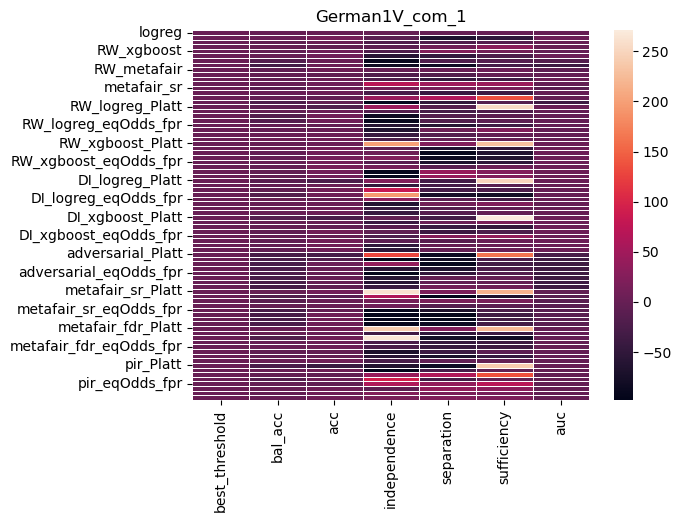

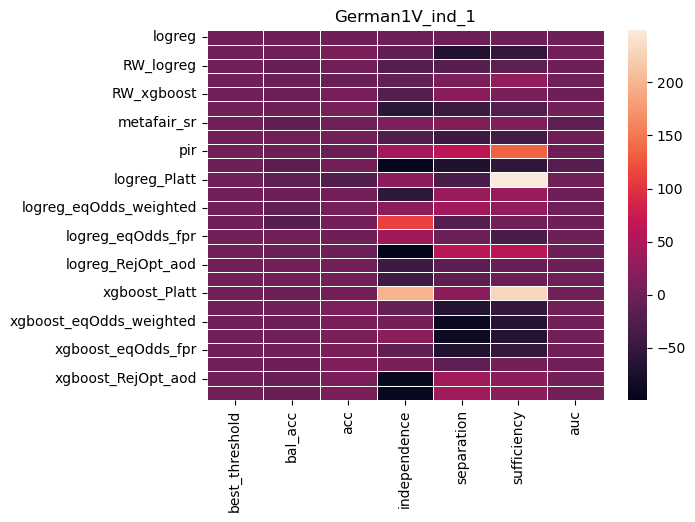

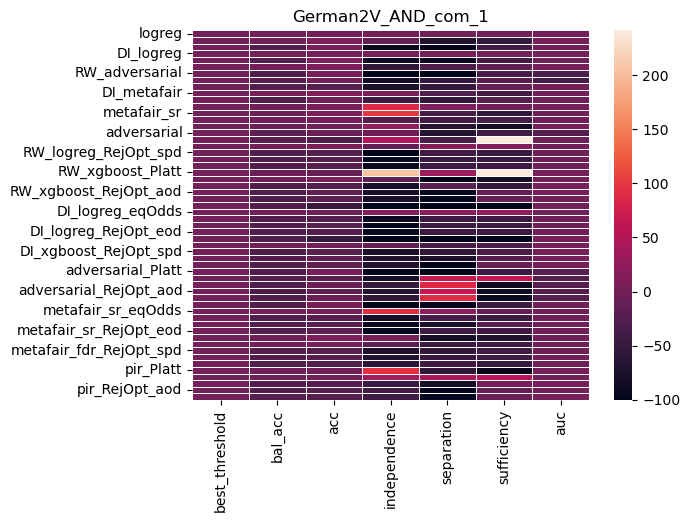

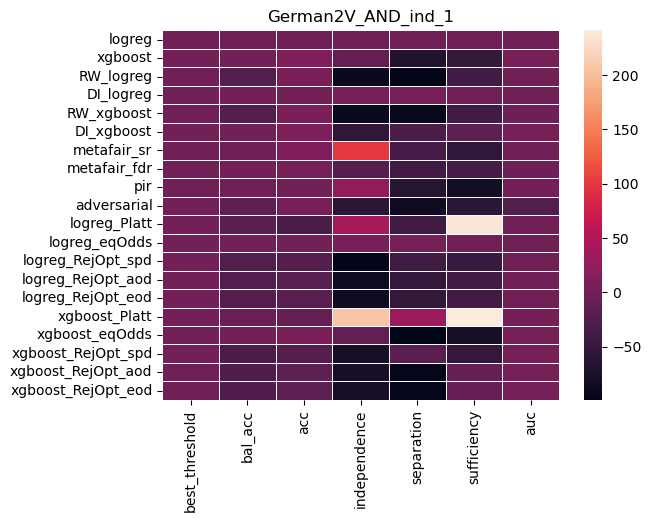

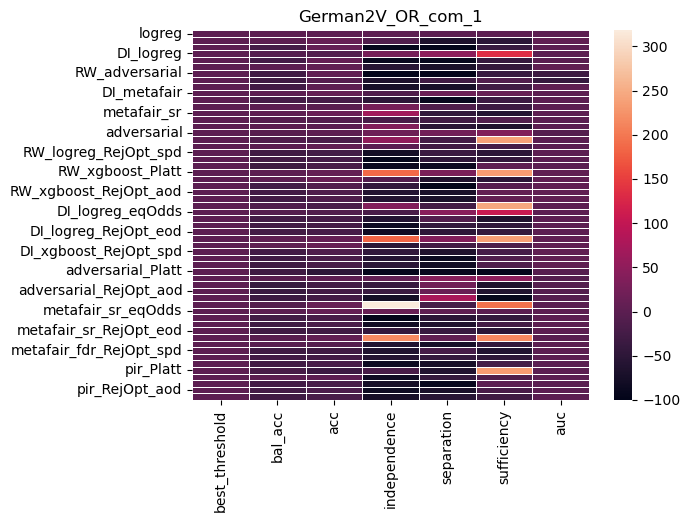

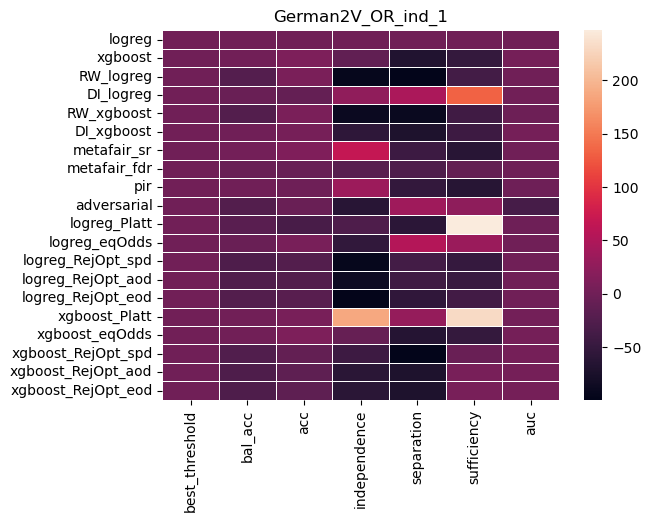

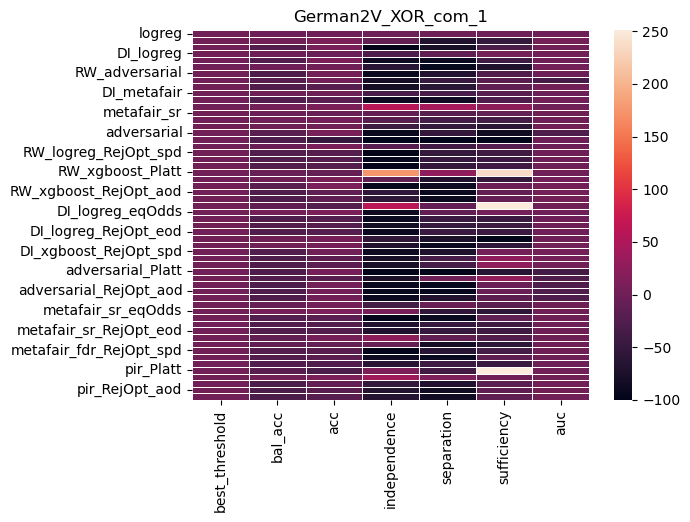

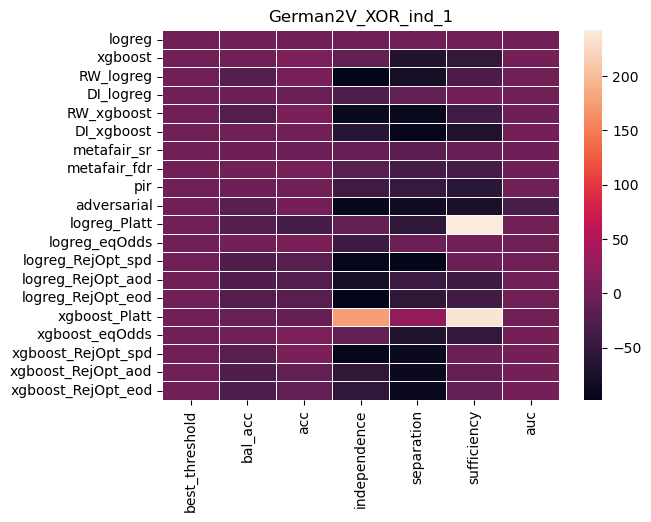

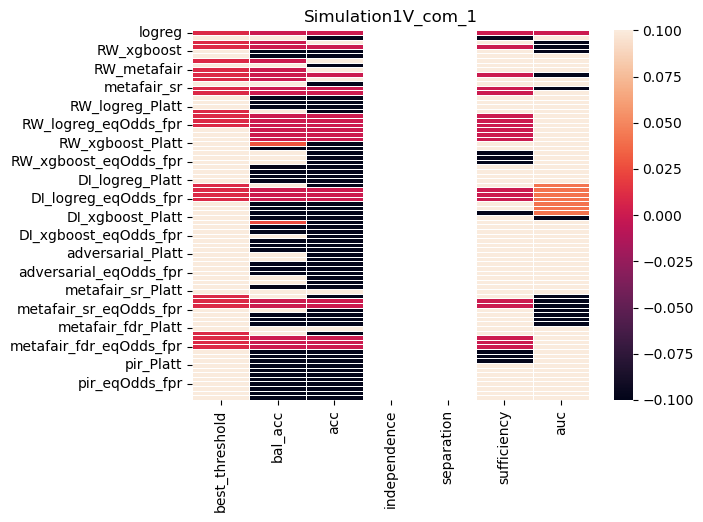

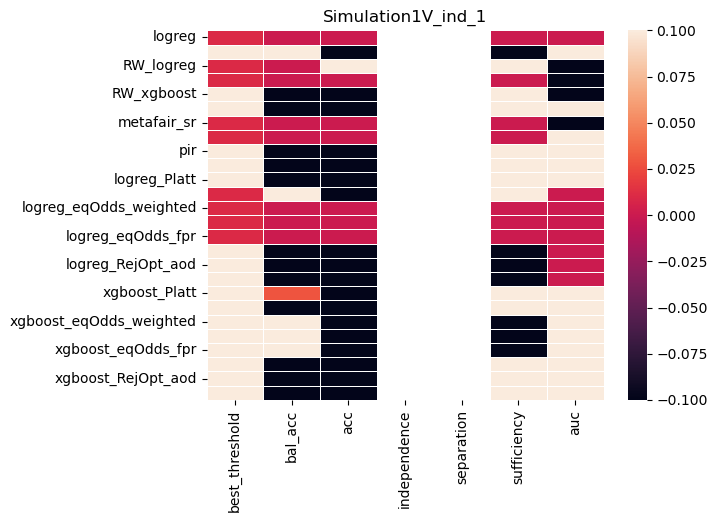

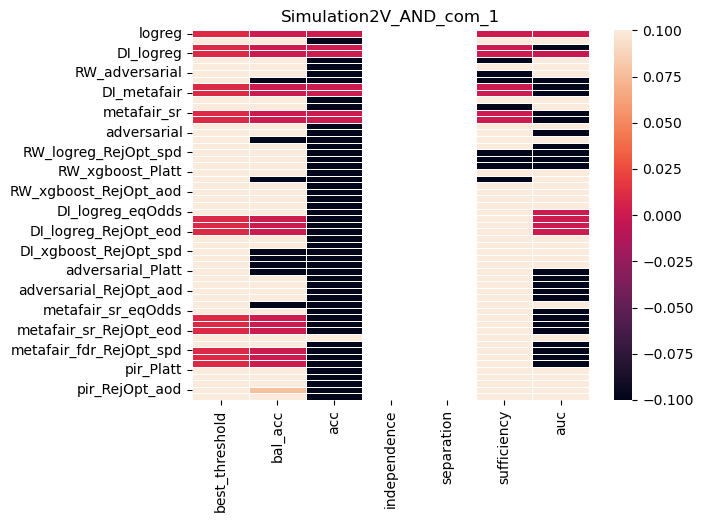

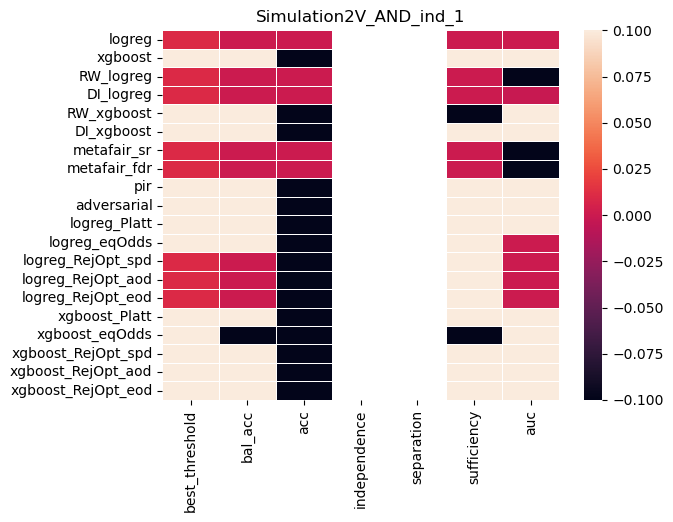

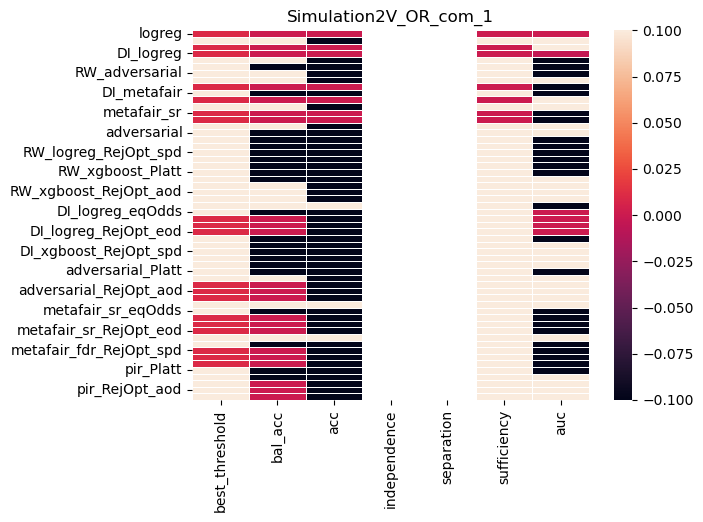

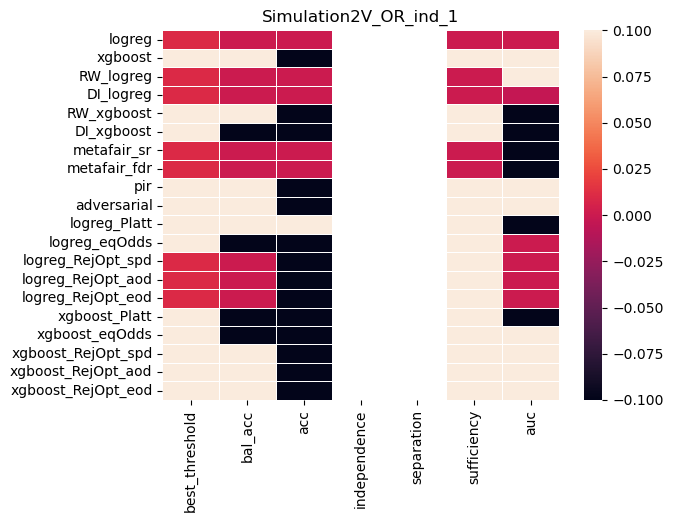

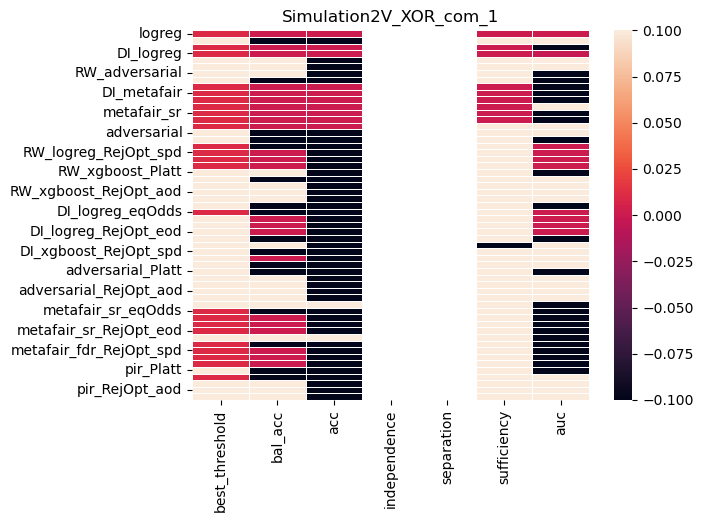

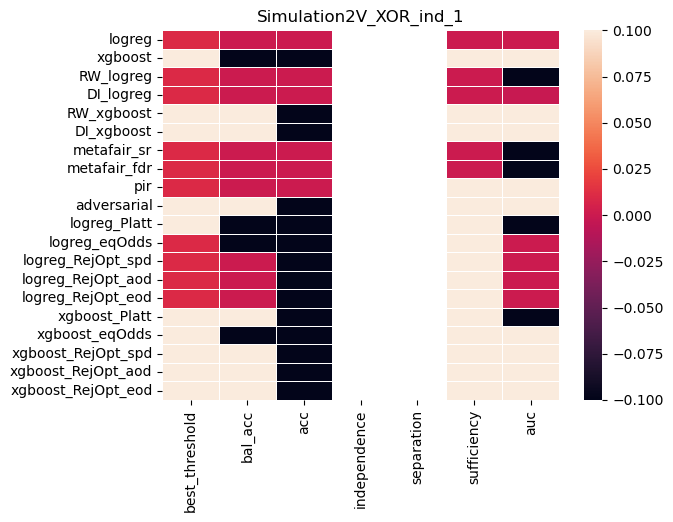

In [50]:
for name in datasets:
    for case in resultsDict[name].keys():
        ax = sns.heatmap(new_tables[name][case], linewidth=0.5)
        ax.set_title(case)
        plt.show()

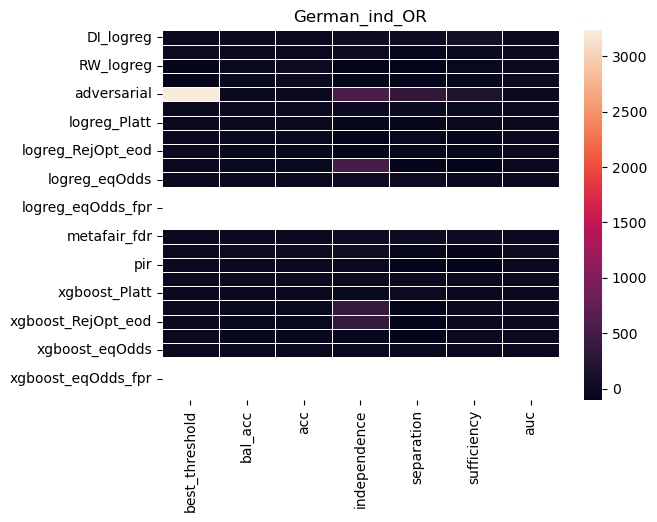

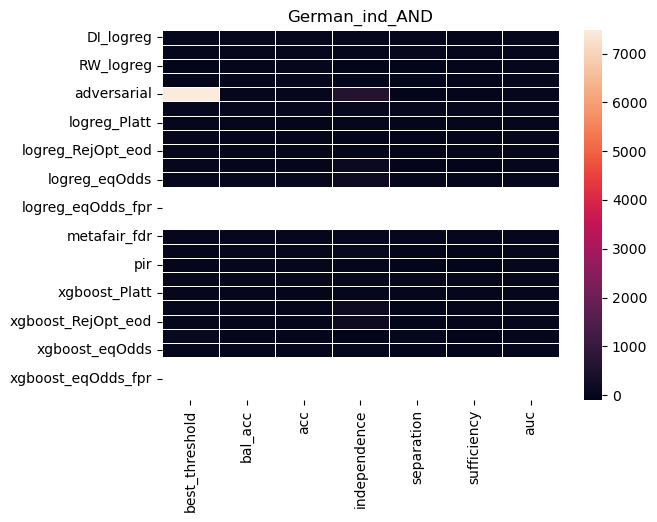

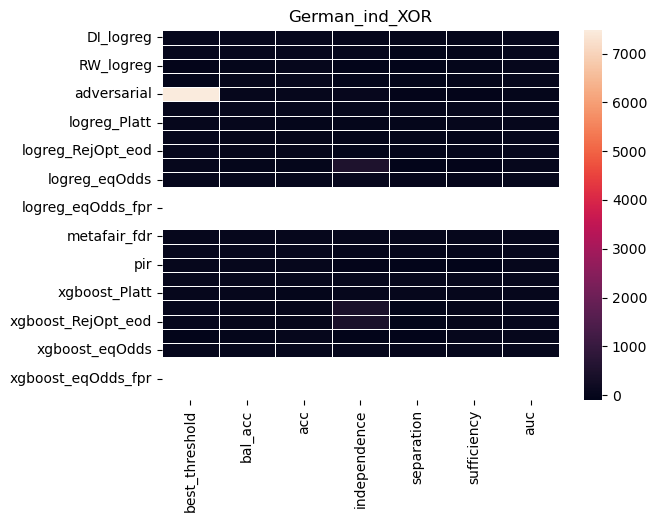

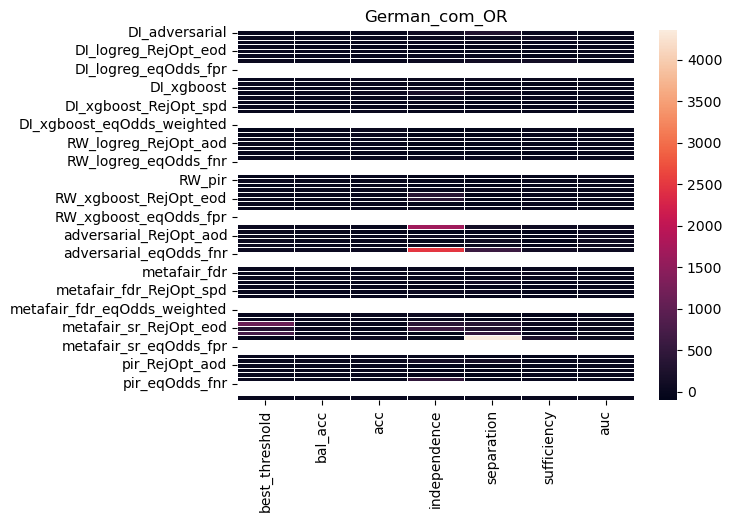

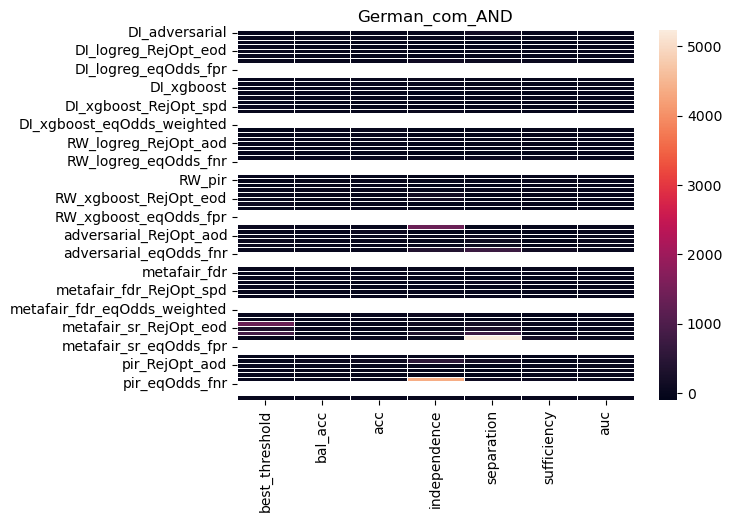

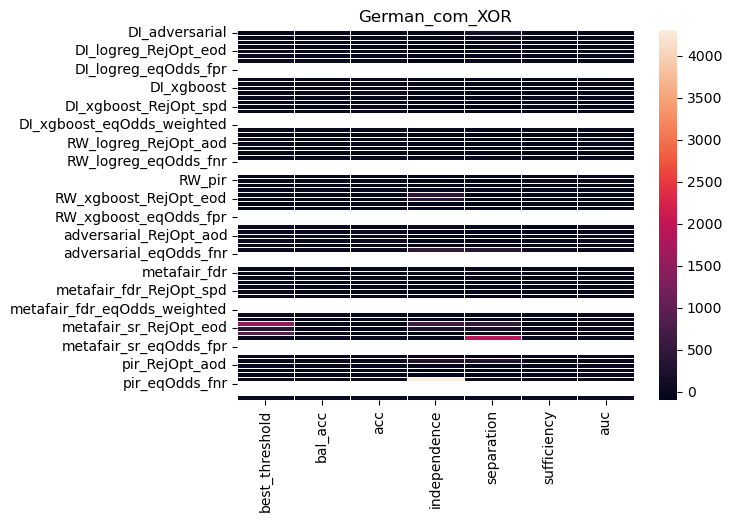

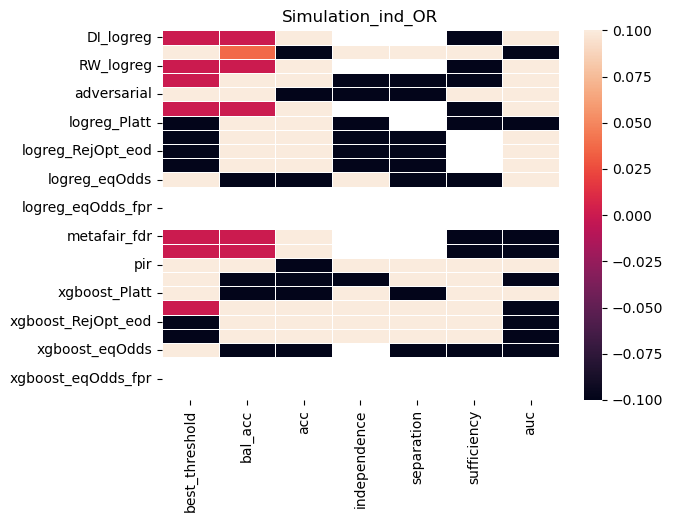

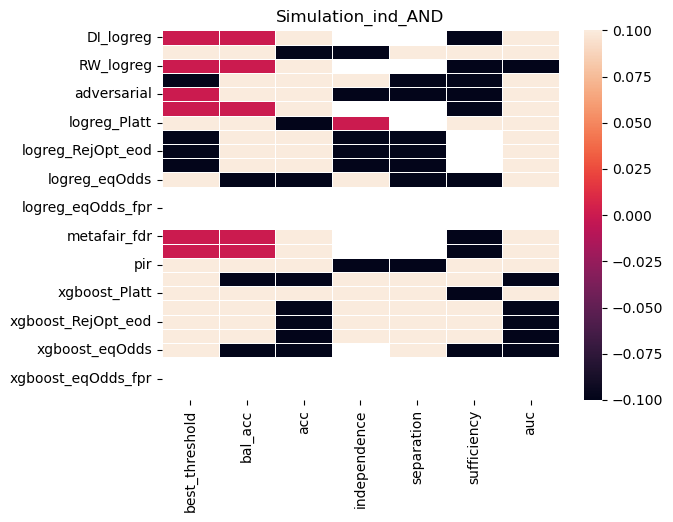

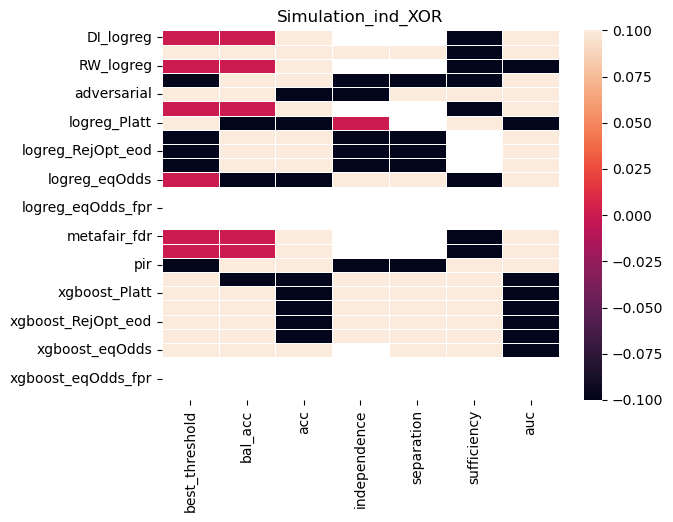

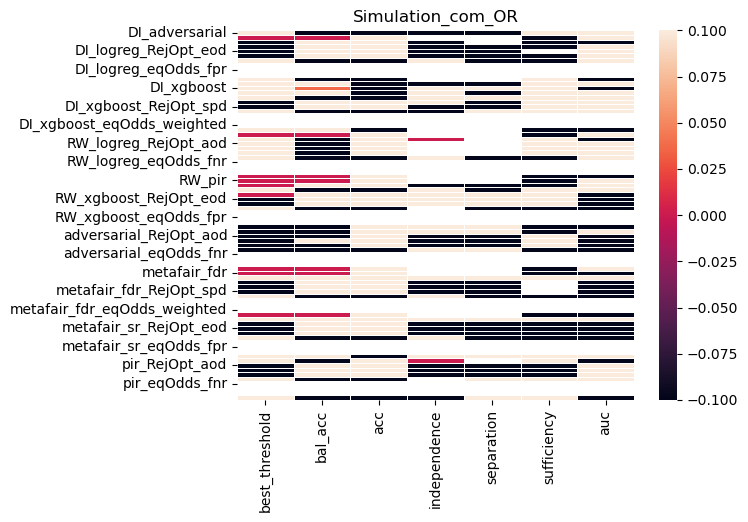

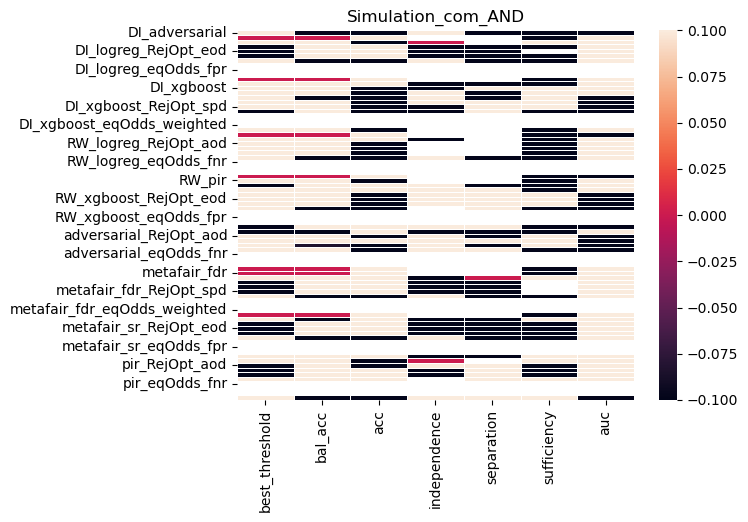

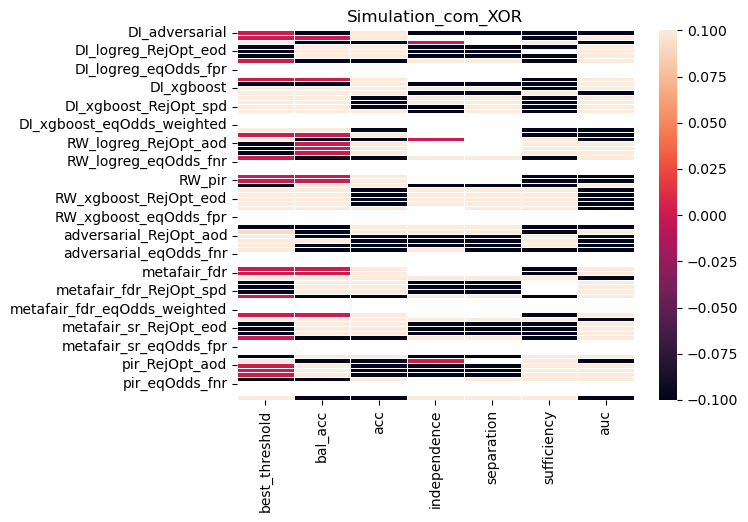

In [52]:
for name in datasets:
    for case in tables_pairs[name].keys():
        for operation in tables_pairs[name][case].keys():
            ax = sns.heatmap(tables_pairs[name][case][operation], linewidth=0.5)
            ax.set_title(name + '_' + case + '_' +  operation)
            plt.show()

In [105]:
def mix_results():
    total_dict = dict()
    for dataset in sweepsDict.keys():
        total_dict[dataset] = dict()
        for case in sweepsDict[dataset].keys():
            for method in sweepsDict[dataset][case]:
                try:
                    total_dict[dataset]['separation'] += sweepsDict[dataset][case][method]['separation']
                    total_dict[dataset]['independence'] += sweepsDict[dataset][case][method]['independence']
                    total_dict[dataset]['sufficiency'] += sweepsDict[dataset][case][method]['sufficiency']
                    total_dict[dataset]['acc'] += sweepsDict[dataset][case][method]['acc']
                except:
                    total_dict[dataset]['separation'] = sweepsDict[dataset][case][method]['separation']
                    total_dict[dataset]['independence'] = sweepsDict[dataset][case][method]['independence']
                    total_dict[dataset]['sufficiency'] = sweepsDict[dataset][case][method]['sufficiency']
                    total_dict[dataset]['acc'] = sweepsDict[dataset][case][method]['acc']


    concrete_result = dict()
    for dataset in sweepsDict.keys():
        concrete_result[dataset] = dict()
        for case in sweepsDict[dataset].keys():
            concrete_result[dataset][case] = dict()
            for method in sweepsDict[dataset][case]:
                try:
                    concrete_result[dataset][case]['separation'] += sweepsDict[dataset][case][method]['separation']
                    concrete_result[dataset][case]['independence'] += sweepsDict[dataset][case][method]['independence']
                    concrete_result[dataset][case]['sufficiency'] += sweepsDict[dataset][case][method]['sufficiency']
                    concrete_result[dataset][case]['acc'] += sweepsDict[dataset][case][method]['acc']
                except:
                    concrete_result[dataset][case]['separation'] = sweepsDict[dataset][case][method]['separation']
                    concrete_result[dataset][case]['independence'] = sweepsDict[dataset][case][method]['independence']
                    concrete_result[dataset][case]['sufficiency'] = sweepsDict[dataset][case][method]['sufficiency']
                    concrete_result[dataset][case]['acc'] = sweepsDict[dataset][case][method]['acc']

    return total_dict, concrete_result

def mix_results_2():
    total_dict = dict()
    for dataset in resultsDict.keys():
        total_dict[dataset] = dict()
        for case in resultsDict[dataset].keys():
            for method in resultsDict[dataset][case].index:
                for metric in resultsDict[dataset][case].columns:
                    try:
                        total_dict[dataset][metric] += [resultsDict[dataset][case].loc[method, metric]]
                    except:
                        total_dict[dataset][metric] = [resultsDict[dataset][case].loc[method, metric]]


    concrete_result = dict()
    for dataset in resultsDict.keys():
        concrete_result[dataset] = dict()
        for case in resultsDict[dataset].keys():
            concrete_result[dataset][case] = dict()
            for method in resultsDict[dataset][case].index:
                for metric in resultsDict[dataset][case].columns:
                    try:
                        concrete_result[dataset][case][metric] += [resultsDict[dataset][case].loc[method, metric]]
                    except:
                        concrete_result[dataset][case][metric] = [resultsDict[dataset][case].loc[method, metric]]

    return total_dict, concrete_result


def plot_pareto(sweeps, metric1_name, metric2_name):

    metric1 = sweeps[metric1_name]
    metric2 = sweeps[metric2_name]

    metric1_np = np.copy(np.array(metric1))
    metric2_np = np.copy(np.array(metric2))
    
    frontier = np.zeros(np.shape(metric1_np)) 

    for value in metric1:
        index = np.where(metric1_np == value)
        minim = np.max(metric2_np[index])
        frontier[index] = minim 

    sorted_frontier = np.array([x for _,x in sorted(zip(metric1, frontier))])
    cum_sorted_frontier = np.minimum.accumulate(sorted_frontier)
    
    fig, ax = plt.subplots()
    ax.set_title('Trade offs')
    ax.set_xlabel(metric1_name)
    ax.set_ylabel(metric2_name)
    ax.step(np.sort(metric1_np), cum_sorted_frontier)
    return fig, ax

total_dict, concrete_result = mix_results_2()

In [99]:
column = 'logreg'
resultsDict['German']['German1V_com_1'].index

Index(['logreg', 'xgboost', 'RW_logreg', 'DI_logreg', 'RW_xgboost',
       'DI_xgboost', 'RW_adversarial', 'DI_adversarial', 'RW_metafair',
       'DI_metafair', 'RW_pir', 'DI_pir', 'metafair_sr', 'metafair_fdr', 'pir',
       'adversarial', 'RW_logreg_Platt', 'RW_logreg_eqOdds',
       'RW_logreg_eqOdds_weighted', 'RW_logreg_eqOdds_fnr',
       'RW_logreg_eqOdds_fpr', 'RW_logreg_RejOpt_spd', 'RW_logreg_RejOpt_aod',
       'RW_logreg_RejOpt_eod', 'RW_xgboost_Platt', 'RW_xgboost_eqOdds',
       'RW_xgboost_eqOdds_weighted', 'RW_xgboost_eqOdds_fnr',
       'RW_xgboost_eqOdds_fpr', 'RW_xgboost_RejOpt_spd',
       'RW_xgboost_RejOpt_aod', 'RW_xgboost_RejOpt_eod', 'DI_logreg_Platt',
       'DI_logreg_eqOdds', 'DI_logreg_eqOdds_weighted', 'DI_logreg_eqOdds_fnr',
       'DI_logreg_eqOdds_fpr', 'DI_logreg_RejOpt_spd', 'DI_logreg_RejOpt_aod',
       'DI_logreg_RejOpt_eod', 'DI_xgboost_Platt', 'DI_xgboost_eqOdds',
       'DI_xgboost_eqOdds_weighted', 'DI_xgboost_eqOdds_fnr',
       'DI_xgboost_e

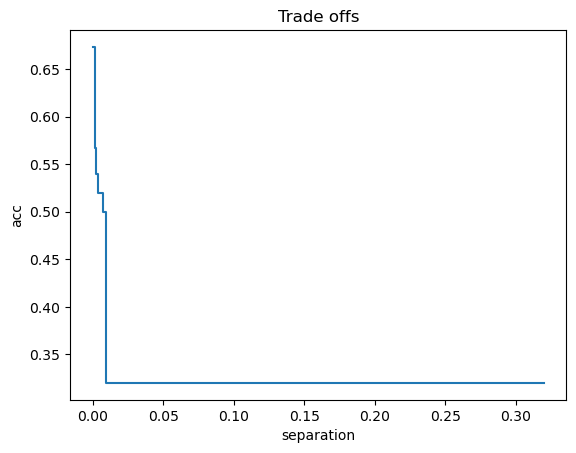

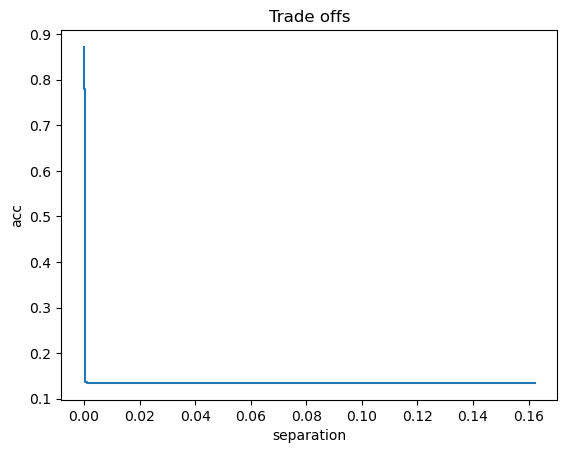

In [101]:
fig, ax = plot_pareto(total_dict['German'], 'separation', 'acc')
fig, ax = plot_pareto(total_dict['Simulation'], 'separation', 'acc')

In [104]:
concrete_result['German']['German1V_com_1']

{}

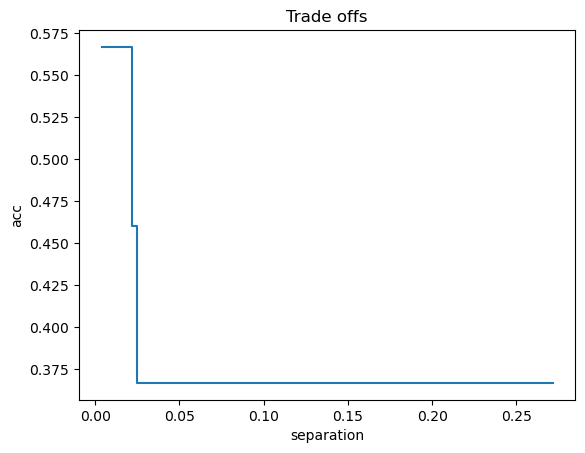

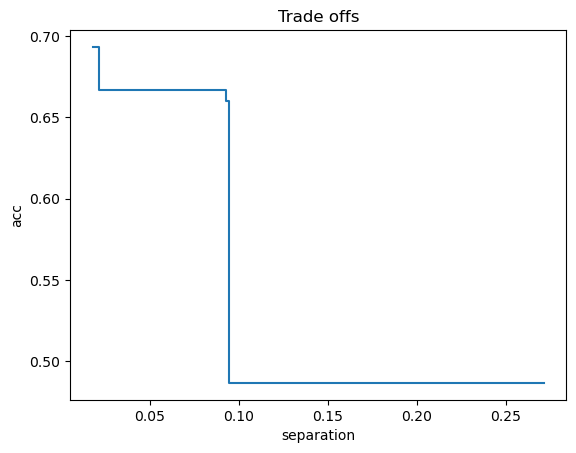

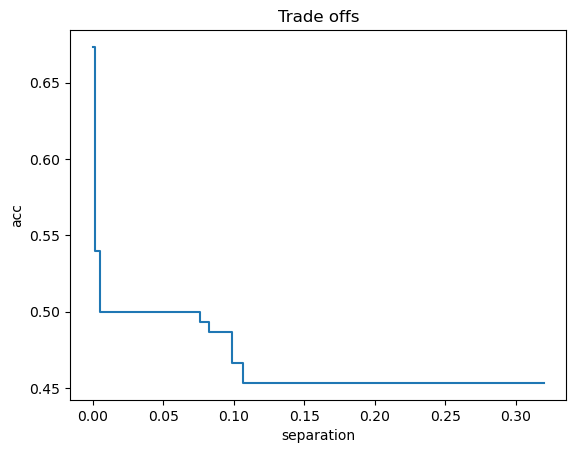

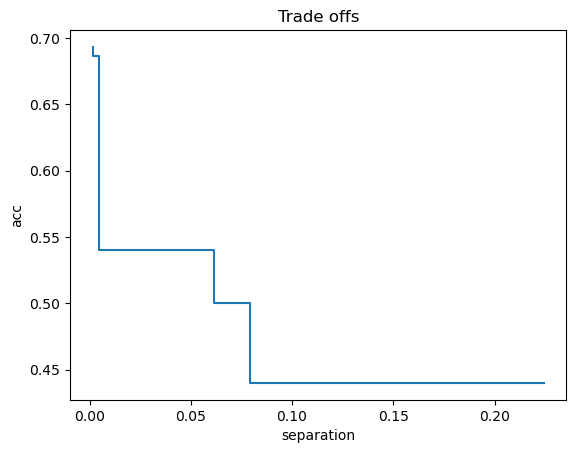

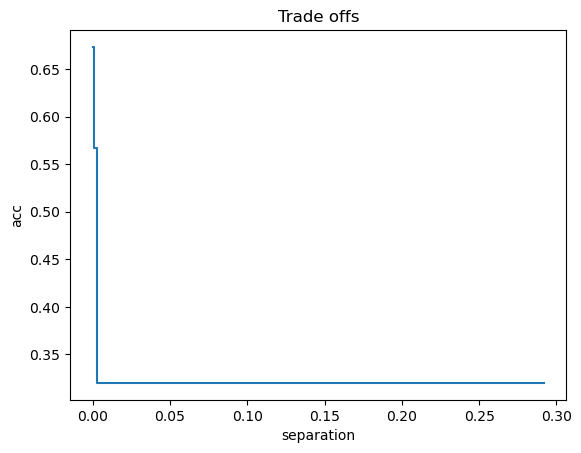

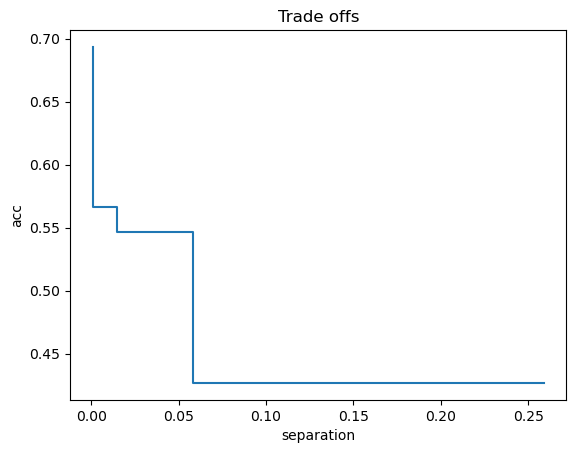

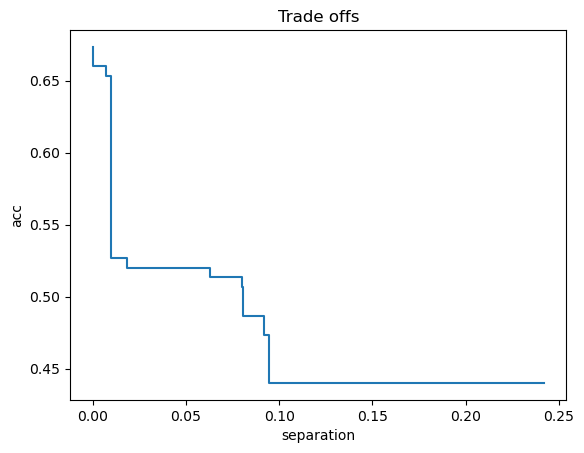

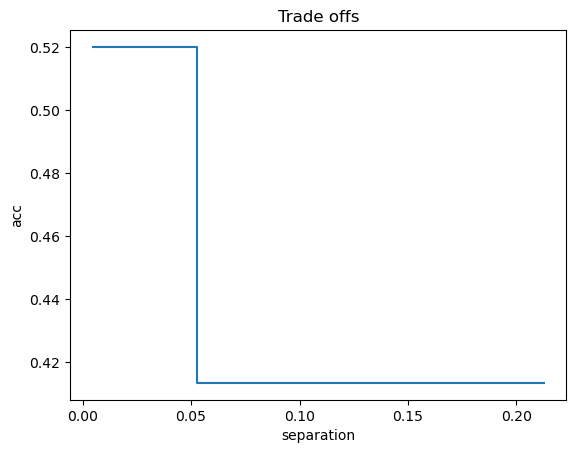

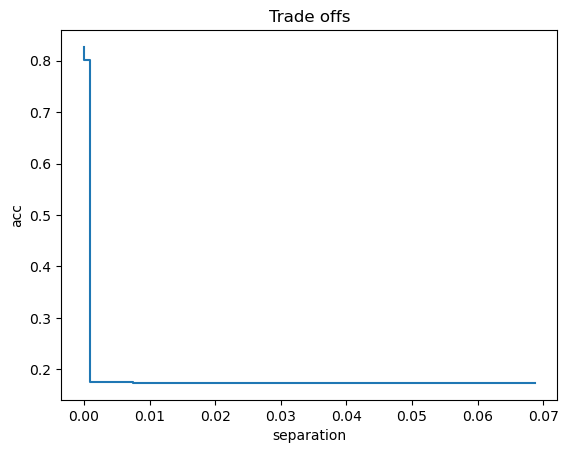

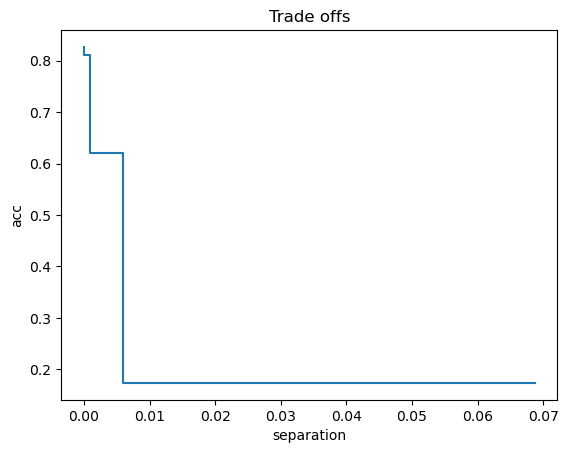

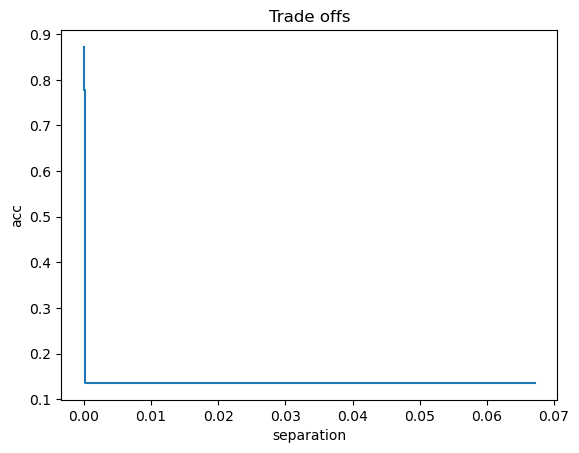

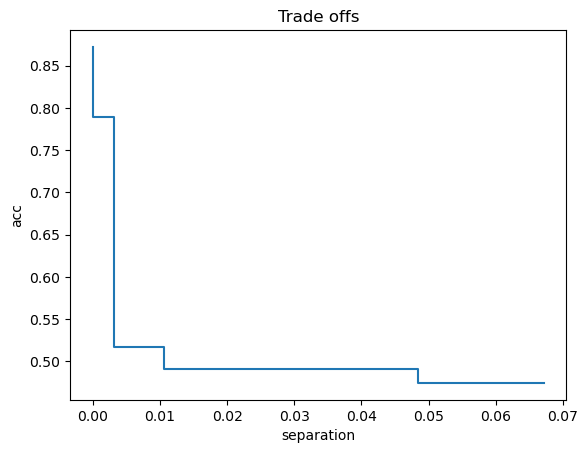

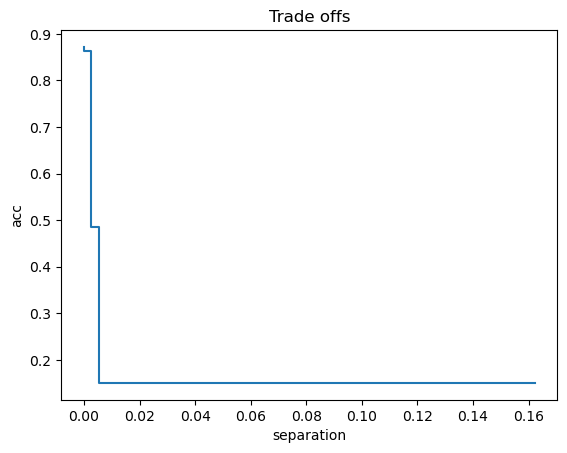

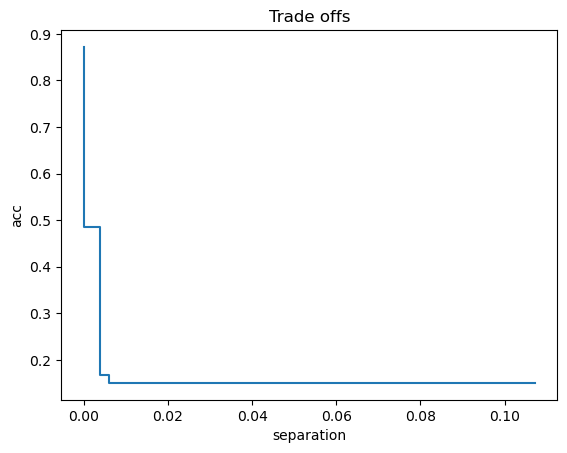

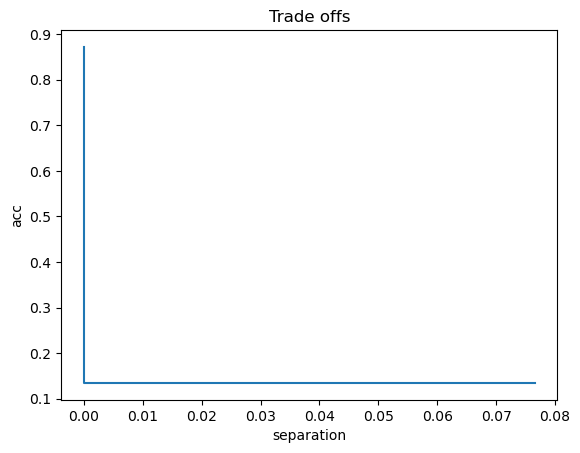

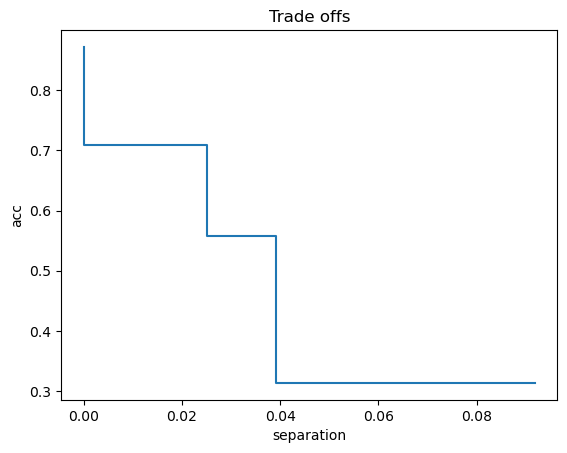

In [106]:
for dataset in datasets:
    for case in sweepsDict[dataset]:
        plot_pareto(concrete_result[dataset][case], 'separation', 'acc')

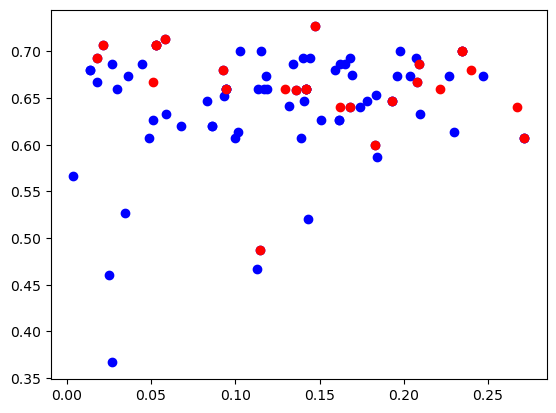

In [87]:
def plot_scatter(results1, results2, metric1, metric2):
    fig, ax = plt.subplots()
    ax.scatter(results1[metric1], results1[metric2], color = 'b')
    ax.scatter(results2[metric2], results2[metric2], color = 'r')
    plt.show()
    return fig, ax

plot_scatter(concrete_result['German'])

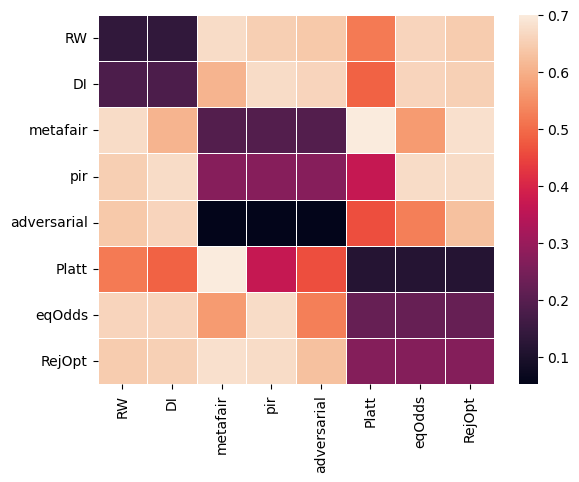

In [165]:
preproc = ['RW', 'DI']
inproc = ['metafair', 'pir', 'adversarial']
postproc = ['Platt', 'eqOdds', 'RejOpt']

proc = preproc + inproc + postproc

default_labels = {
    'RW': 'RW_logreg',
    'DI': 'DI_logreg',
    'adversarial': 'adversarial',
    'metafair': 'metafair_sr',
    'pir': 'pir',
    'Platt': 'Platt',
    'eqOdds': 'eqOdds',
    'RejOpt': 'RejOpt_spd'
    }


def combination_matrix(resultsInd, resultsCom):

    matrices = dict()
    metrics = ['acc', 'bal_acc', 'independence', 'separation', 'sufficiency']
    for metric in metrics:
        matrices[metric] = pd.DataFrame(np.nan, index=proc, columns=proc)

    for index1 in proc:
        for index2 in proc:
            if \
                (index1 in preproc and index2 in preproc) or \
                (index1 in inproc and index2 in inproc) or \
                (index1 in postproc and index2 in postproc):

                if index1 in postproc:
                    nameUse = 'logreg_' + default_labels[index1]
                else:
                    nameUse = default_labels[index1]

                for metric in metrics:
                    matrices[metric].loc[index1, index2] = resultsInd.loc[nameUse, metric]

            else:
                if np.isnan(matrices['acc'].loc[index1, index2]):
                    if (index1 in preproc and index2 in inproc):
                        method_name = index1 + '_' + index2
                    else:
                        method_name = default_labels[index1] + '_' + default_labels[index2]                    
                    
                    for metric in metrics:
                        matrices[metric].loc[index1, index2] = resultsCom.loc[method_name, 'acc']
                        matrices[metric].loc[index2, index1] = resultsCom.loc[method_name, 'acc']
                    
    return matrices


def plot_heat_combination_matrix(resultsInd, resultsCom, metric):
    matrices = combination_matrix(resultsInd, resultsCom)
    matrix_metric = matrices[metric]
    fig, ax = plt.subplots()
    sns.heatmap(matrix_metric, linewidth=0.5, ax = ax)
    return fig, ax



fig, ax = plot_heat_combination_matrix(resultsDict['German']['German1V_ind_1'], resultsDict['German']['German1V_com_1'], 'separation')


C:\Users\Arturo\AppData\Local\Temp\ipykernel_2936\1249887308.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_2936\1249887308.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]]
C:\Users\Arturo\AppData\Local\Temp\ipykernel_2936\1249887308.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, int

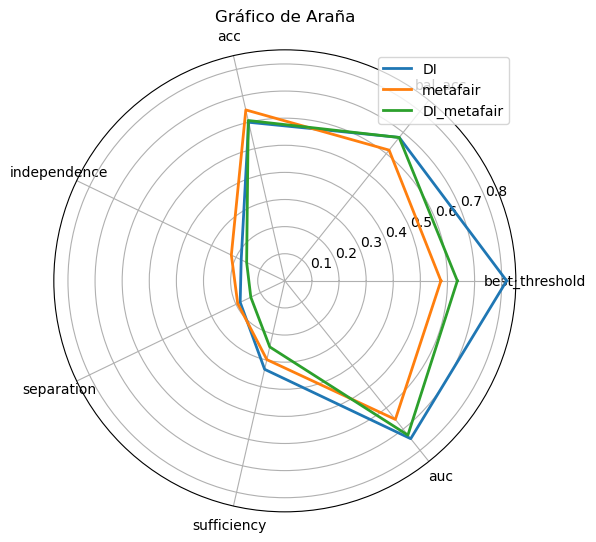

(<Figure size 600x600 with 1 Axes>,
 <PolarAxes: title={'center': 'Gráfico de Araña'}>)

In [177]:
from math import pi


def plot_spider(resultsInd, resultsCom, method1, method2):

    cathegories = list(resultsInd.columns)

    values = dict()
    values[method1] = dict()
    values[method2] = dict()

    if (method1 in preproc and method2 in inproc):
        com_name = method1 + '_' + method2
    else:
        com_name = default_labels[method1] + '_' + default_labels[method2]   
    values[com_name] = dict()

    values[method1] = resultsInd.loc[default_labels[method1]].tolist() + [resultsInd.loc[default_labels[method1]][0]]
    values[method2] = resultsInd.loc[default_labels[method2]].tolist() + [resultsInd.loc[default_labels[method2]][0]] 
    values[com_name] = resultsCom.loc[com_name].tolist() + [resultsCom.loc[com_name][0]]

    N = len(cathegories)
    angles = [n / float(N) * 2 * pi for n in range(N)] + [0]

    # Crear figura
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
    ax.plot(angles, values[method1], label=method1, linewidth=2)
    # ax.fill(angles, valores_a, alpha=0.25)
    ax.plot(angles, values[method2], label=method2, linewidth=2)
    # ax.fill(angles, valores_b, alpha=0.25)
    ax.plot(angles, values[com_name], label=com_name, linewidth=2)
    # ax.fill(angles, valores_c, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(cathegories)
    plt.title('Gráfico de Araña')
    plt.legend()
    plt.show()
    return fig, ax

plot_spider(resultsDict['German']['German1V_ind_1'], resultsDict['German']['German1V_com_1'], 'DI', 'metafair')


In [171]:
import networkx as nx

# Crear grafo
G = nx.Graph()

# Agregar nodos y relaciones
algoritmos = ['A', 'B', 'C', 'D']
combinaciones = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D')]
pesos = [0.9, 0.85, 0.87, 0.88, 0.86]  # Ejemplo: desempeño combinado

G.add_nodes_from(algoritmos)
for comb, peso in zip(combinaciones, pesos):
    G.add_edge(comb[0], comb[1], weight=peso)

# Dibujar grafo
pos = nx.spring_layout(G)  # Layout automático
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Gráfico de Nodos (Relaciones)')
plt.show()

[0.7171428571428571,
 0.6610626093696911,
 0.6586785611969322,
 0.1561449887337436,
 0.1359848484848484,
 0.21998517786561256,
 0.7443058031293326]

In [118]:
collapse_labels_preproc('metafair_sdr')

'metafair'

Haz KDE, histogramas, spider graph, gráfico de nodos, 

In [ ]:
results

In [111]:
resultsDict['German']['German1V_com_1'].index

Index(['logreg', 'xgboost', 'RW_logreg', 'DI_logreg', 'RW_xgboost',
       'DI_xgboost', 'RW_adversarial', 'DI_adversarial', 'RW_metafair',
       'DI_metafair', 'RW_pir', 'DI_pir', 'metafair_sr', 'metafair_fdr', 'pir',
       'adversarial', 'RW_logreg_Platt', 'RW_logreg_eqOdds',
       'RW_logreg_eqOdds_weighted', 'RW_logreg_eqOdds_fnr',
       'RW_logreg_eqOdds_fpr', 'RW_logreg_RejOpt_spd', 'RW_logreg_RejOpt_aod',
       'RW_logreg_RejOpt_eod', 'RW_xgboost_Platt', 'RW_xgboost_eqOdds',
       'RW_xgboost_eqOdds_weighted', 'RW_xgboost_eqOdds_fnr',
       'RW_xgboost_eqOdds_fpr', 'RW_xgboost_RejOpt_spd',
       'RW_xgboost_RejOpt_aod', 'RW_xgboost_RejOpt_eod', 'DI_logreg_Platt',
       'DI_logreg_eqOdds', 'DI_logreg_eqOdds_weighted', 'DI_logreg_eqOdds_fnr',
       'DI_logreg_eqOdds_fpr', 'DI_logreg_RejOpt_spd', 'DI_logreg_RejOpt_aod',
       'DI_logreg_RejOpt_eod', 'DI_xgboost_Platt', 'DI_xgboost_eqOdds',
       'DI_xgboost_eqOdds_weighted', 'DI_xgboost_eqOdds_fnr',
       'DI_xgboost_e